# Modell zur Berechnung der Schichtdicken durch das Fouriersche Gesetz

## Vorbereitungen

In [1]:
#Importieren der Module und Konstanten

import numpy as np
import math
from scipy.constants import G
from scipy.constants import Stefan_Boltzmann as sigma
import matplotlib.pyplot as plt
from Modell_2_as_function import mindestabstand

In [2]:
#Funktion zur Berechnung der Dicke der Wasserschicht

def layers(R_p, dW, R_stern, T_stern, M_stern, A_B, e, a_p, k_2, Q):
    x_u = R_p
    x_o = R_p + dW

    #Naturkonstanten
    rho_w = 997 #mittlere Dichte von Wasser in kg/m^3
    rho_e = 910 #mittlere Dichte von Eis in kg/m^3
    l_W = 0.5562 #Wärmeleitfähigkeit des Wassers
    l_E = 2.33 #Wärmeleitfähigkeit des Eises

    #Berechenete Eigenschaften des Planeten
    A = 4*math.pi*x_u**2 #Oberfläche des festen Kerns in Quadratmetern
    
    #Berechnung von Leistung und Temperatur
    mean_motion = math.sqrt(G*M_stern/(a_p**3))
    E_tidal = 21/2*k_2/Q*G*M_stern**2*R_p**5*mean_motion*e**2/a_p**6
    h_s = sigma*R_stern**2*T_stern**4/a_p**2
    E_stern = h_s*math.pi*R_p**2*(1-A_B)
    T_o = math.sqrt(R_stern/(2*a_p)) * (1-A_B)**(1/4) * T_stern
    T_o2 = ((E_stern)/(4*math.pi*sigma*R_p**2))**(1/4) #Berechnung mit oder ohne leistung der Gezeitenheizung?
    T_m = 273.15 #mittlere Temperatur wird auf den Gefrierpunkt gesetzt
    print(T_o)
    print(T_o2)

    #Berechnung der Schichtdicke
    x_m = x_o - (l_E*A) * (T_m-T_o)/(E_tidal)
    
    T_u = T_m + E_tidal/(l_W*A) * (x_m-x_u)

    return x_o-x_u, x_o-x_m, x_m-x_u


## Eingabe der Systemparameter

In [3]:
R_stern = 0.6 *6.96342e8 #Radius des Sterns, *6.96342*10**8 weil sonnenradius
T_stern = 2500 #2500 # in Kelvin
M_stern = 0.6 *1.989e30 #Masse des Sterns, *1.989*10**30 weil sonnenmasse
R_p = 1 *6370e3 #6e6 #Radius des Planeten, zwischen 2e6 und 12e6 für Gesteinsplaneten
A_B = 0.9 #0.1 bis 0.9
e = 0.05 #0.05 #0.1 bis 0.9
a_p = 0.5 * 149597870e3 #AU große Halbachse
dW = 10000 #Gesamte Schichtdicke in Metern
k_2 = 0.3 #0.01 bis 1, 0.3 bei der Erde
Q = 100 #1 bis 10**6, 100 bei der Erde

### Grafiken erstellen

In [4]:
#R_stern_list = [0.6] *6.96342*10**8 #Radius des Sterns, *6.96342*10**8 weil sonnenradius
#T_stern_list = [2500] # in Kelvin
#M_stern_list = [0.6] *1.989*10**30 #Masse des Sterns, *1.989*10**30 weil sonnenmasse
R_p_list = [2e6, 2.5e6, 3e6, 3.5e6, 4e6, 4.5e6, 5e6, 5.5e6, 6e6, 6.5e6, 7e6, 7.5e6, 8e6, 8.5e6, 9e6, 9.5e6, 10e6, 10.5e6, 11e6, 11.5e6, 12e6] #Radius des Planeten, zwischen 2e6 und 12e6 für Gesteinsplaneten
#A_B_list = [0.9] #0.1 bis 0.9
#e_list = [0.05] #0.1 bis 0.9
a_p_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2] # * 14959787000 AU große Halbachse
dW_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000] #Gesamte Schichtdicke in Metern

525.3505923619822
525.3505923619822
371.47896635952725
371.47896635952725
303.3113059191198
303.3113059191198
262.6752961809911
262.6752961809911
234.94392730823478
234.9439273082348
214.473481225957
214.47348122595702
198.56385978718197
198.56385978718197
185.73948317976362
185.73948317976362
175.11686412066075
175.11686412066072
166.13044419825212
166.13044419825212
158.39916347778586
158.39916347778583
151.6556529595599
151.6556529595599
145.70603833511595
145.70603833511595
140.4058517540912
140.40585175409117
135.64493967587723
135.64493967587723
131.33764809049555
131.33764809049555
127.41623428172115
127.41623428172113
123.82632211984242
123.82632211984243
120.52369168605848
120.52369168605848
117.47196365411739
117.4719636541174


Text(0, 0.5, 'große Halbachse in AU')

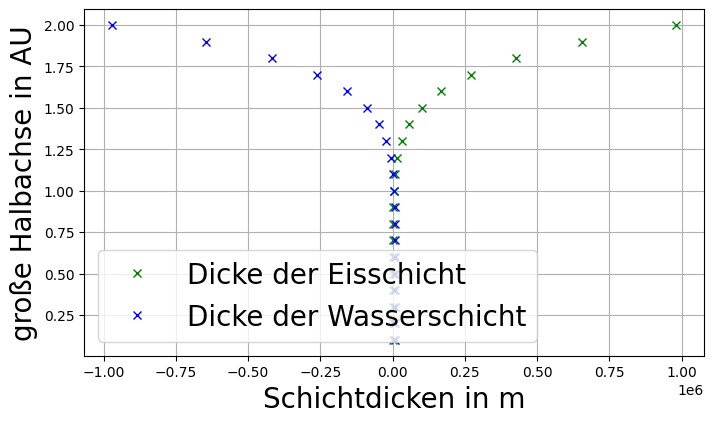

In [5]:
x2 = []
x3 = []

for i in range(len(a_p_list)):
    result = layers(R_p, dW, R_stern, T_stern, M_stern, A_B, e, a_p_list[i]* 14959787000, k_2, Q)

    x2.append(result[1]) #dicke der Eisschicht in m
    x3.append(result[2]) #dicke der Wasserschicht in m
    

y = a_p_list



fig, ax = plt.subplots(figsize=(8, 4.5)) 
#ax.plot(x1,y,'rx',label="Dicke beider Schichten")
ax.plot(x2,y,'gx',label="Dicke der Eisschicht")
ax.plot(x3,y,'bx',label="Dicke der Wasserschicht")
ax.legend(loc='lower left', fontsize=20)
ax.grid(True)
#ax.set_xlim(-100, 10100)
#ax.set_ylim(0,1.2)
ax.set_xlabel("Schichtdicken in m", fontsize=20)
ax.set_ylabel("große Halbachse in AU", fontsize=20)

### einzelne Werte berechnen

In [6]:
erg = layers(R_p, dW, R_stern, T_stern, M_stern, A_B, e, a_p, k_2, Q)
print("Dicke der Eisschicht", erg[1])
print("Dicke der Wasserschicht", erg[2])

74.29579327190545
74.29579327190545
Dicke der Eisschicht 1208018671.1374
Dicke der Wasserschicht -1208008671.1374


In [7]:
a_min = math.sqrt(1-A_B)*(T_stern/273.15)**2*R_stern/2

print(a_p)
print(mindestabstand(R_stern, T_stern, A_B))

74798935000.0
5533774437.743105
